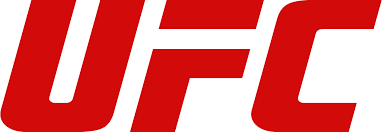

# Analysing UFC Fight Data for Machine Learning

The purpose of this notebook is to use machine learning models to successful predict the outcome of a fight between two figther (Red Fighter & BLue Fighter) using all hostorical data from the Ulimate Fighting Championship. This notebook is broken down into the following areas:

1. Loading relevant Libraries
2. Loading UFC historical fight data 
2. Define data in the UFC data dictionary
4. Stastical summary
5. Analyse the missing data


3. UFC data dictionary
Analysing the state of the data
4. Data processing
5. Data cleaning 
6. Machine learning models
7. Conclusion and Analysis

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# set the float format to 2 decimal places
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.precision', 2)

# set the display to max columns
pd.set_option('display.max_columns', None)

# set the display to 30 rows
pd.set_option('display.max_rows', 30)

# set the column width
pd.set_option('display.max_colwidth', 20)

import warnings
warnings.filterwarnings('ignore')

# Load Fight Dataset 

In [5]:
# Loading the data
path=r"C:\Users\Slmss\OneDrive\Desktop\A.I. Factory\Data_Science-_Dummy-main\UFC\data.csv"
data=pd.read_csv(path)

In [6]:
print("The head of the data: ")
data.head()

The head of the data: 


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevad...",Red,False,Bantamweight,0.00,0.00,0.42,0.49,0.33,0.36,0.50,1.00,0.00,0.00,50.00,20.00,84.00,45.00,76.50,41.00,114.00,64.00,1.50,1.00,9.00,6.50,39.50,11.00,63.00,27.50,7.50,7.00,12.00,9.00,3.00,2.00,9.00,8.50,35.00,12.50,43.50,17.50,10.50,4.50,4.00,3.00,4.50,3.00,36.50,24.50,34.00,277.50,531.50,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.00,1.00,0.00,0.50,0.46,0.00,0.00,0.00,0.00,0.00,0.00,34.00,17.00,13.00,6.00,35.00,18.00,16.00,9.00,0.00,0.00,3.00,0.00,32.00,15.00,11.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,33.00,16.00,12.00,6.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,54.00,166.00,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.00,31.00,27.00
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevad...",Red,False,Middleweight,0.50,0.00,0.66,0.30,0.30,0.50,1.50,0.00,0.00,0.00,65.50,35.00,50.00,16.50,113.50,68.50,68.50,29.00,2.50,1.50,0.50,0.50,46.00,20.00,36.00,7.50,12.00,8.00,8.00,3.00,7.50,7.00,6.00,6.00,58.00,30.00,48.00,15.50,0.50,0.50,0.50,0.50,7.00,4.50,1.50,0.50,219.50,24.50,577.50,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Orthodox,187.96,193.04,205.00,1.03,0.06,0.58,0.38,0.41,0.12,0.25,1.19,0.38,0.25,77.56,43.16,69.16,27.59,93.12,57.22,98.34,52.47,1.28,0.78,4.69,0.44,71.09,38.06,50.41,13.34,4.69,3.31,9.09,6.16,1.78,1.78,9.66,8.09,58.31,30.44,63.3

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [8]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,4585.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6002.00,5121.00,6004.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,5300.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6012.00,6008.00,5606.00,6010.00,5840.00,5949.00
mean,0.25,0.18,0.45,0.43,0.29,0.27,0.48,0.41,0.16,0.14,76.29,33.34,73.09,31.05,97.64,52.28,92.72,48.50,2.73,1.11,2.86,1.07,59.98,21.39,57.06,19.40,9.68,6.68,9.37,6.35,6.62,5.27,6.67,5.30,60.06,22.31,58.57,21.29,8.07,5.51,7.48,5.05,8.16,5.51,7.04,4.72,137.28,132.59,611.41,9.44,0.28,0.95,0.40,1.63,2.58,1.54,0.00,0.02,0.22,0.84,0.90,0.57,0.04,178.95,183.23,170.59,0.24,0.19,0.46,0.43,0.30,0

# Defining the Data

<div class="output_subarea output_html rendered_html" dir="auto"
     style=overflow:scroll;width:800px;height:400px;padding:5px><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Column Name</th>
      <th>Description</th>
      <th>Feature Area</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R_fighter</td>
      <td>Name of red corner fighter</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>B_fighter</td>
      <td>Name of blue corner fighter</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>Referee</td>
      <td>Name of Referee</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>date</td>
      <td>Date of fight</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>location</td>
      <td>Location of fight</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>Winner</td>
      <td>Winner of fight</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>title_bout</td>
      <td>Where fight was championship bout</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>weight_class</td>
      <td>Weight class of fighter</td>
      <td>Fight Information</td>
    </tr>
    <tr>
      <td>B_avg_KD</td>
      <td>Average knockdowns caused by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_KD</td>
      <td>Average knockdowns of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_SIG_STR_pct</td>
      <td>Average significant strikes landed percentage by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_SIG_STR_pct</td>
      <td>Average significant strikes landed of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_TD_pct</td>
      <td>Average takedown percentage by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_TD_pct</td>
      <td>Average takedown percentage of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_SUB_ATT</td>
      <td>Average submissions attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_SUB_ATT</td>
      <td>Average submissions attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_REV</td>
      <td>Average number of reversals landed by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_REV</td>
      <td>Average number of reversals of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_SIG_STR_att</td>
      <td>Average number of significant strikes attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_SIG_STR_landed</td>
      <td>Average number of significant strikes landed by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_SIG_STR_att</td>
      <td>Average number of significant strikes attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_SIG_STR_landed</td>
      <td>Average number of significant strikes landed of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_TOTAL_STR_att</td>
      <td>Average number of total strikes attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_TOTAL_STR_landed</td>
      <td>Average number of total strikes landed attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_TOTAL_STR_att</td>
      <td>Average number of total strikes attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_TOTAL_STR_landed</td>
      <td>Average number of total strikes landed attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_TD_att</td>
      <td>Average takedowns attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_TD_landed</td>
      <td>Average takedowns landed by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_TD_att</td>
      <td>Average takedowns attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_TD_landed</td>
      <td>Average takedowns landed of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_HEAD_att</td>
      <td>Average number of significant strikes to the head attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_HEAD_landed</td>
      <td>Average number of significant strikes to the head landed by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_HEAD_att</td>
      <td>Average number of significant strikes to the head attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_HEAD_landed</td>
      <td>Average number of significant strikes to the head landed of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_BODY_att</td>
      <td>Average number of body shots attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_BODY_landed</td>
      <td>Average number of body shots landed by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_BODY_att</td>
      <td>Average number of body shots attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_BODY_landed</td>
      <td>Average number of body shots landed of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_LEG_att</td>
      <td>Average leg kicks attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_LEG_landed</td>
      <td>Average leg kicks landed by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_LEG_att</td>
      <td>Average leg kicks attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_LEG_landed</td>
      <td>Average leg kicks landed of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_DISTANCE_att</td>
      <td>Average distance strikes attempted by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_DISTANCE_landed</td>
      <td>Average distance strikes landed by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_DISTANCE_att</td>
      <td>Average distance strikes attempted of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_DISTANCE_landed</td>
      <td>Average distance strikes landed of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_CLINCH_att</td>
      <td>Average significant strikes attempted in the clinch by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_CLINCH_landed</td>
      <td>Average significant strikes landed in the clinch by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_CLINCH_att</td>
      <td>Average significant strikes attempted in the clinch of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_CLINCH_landed</td>
      <td>Average significant strikes landed in the clinch of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_GROUND_att</td>
      <td>Average significant strikes attempted on the ground by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_GROUND_landed</td>
      <td>Average significant strikes landed on the ground by blue fighter</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_GROUND_att</td>
      <td>Average significant strikes attempted on the ground of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_GROUND_landed</td>
      <td>Average significant strikes landed on the ground of opponent</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_CTRL_time(seconds)</td>
      <td>Average fight control time by blue fighter in seconds</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_avg_opp_CTRL_time(seconds)</td>
      <td>Average fight control time of opponent in seconds</td>
      <td>In Fight statistics for the Blue Corner</td>
    </tr>
    <tr>
      <td>B_total_time_fought(seconds)</td>
      <td>Total time fought by blue fighter in seconds</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_total_rounds_fought</td>
      <td>Total rounds fought by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_total_title_bouts</td>
      <td>Total title boughts by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_current_win_streak</td>
      <td>Current win streak by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_current_lose_streak</td>
      <td>Current losing streak by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_longest_win_streak</td>
      <td>Longest winning streak by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_wins</td>
      <td>Total wins by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_losses</td>
      <td>Total losses by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_draw</td>
      <td>Total draws by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_win_by_Decision_Majority</td>
      <td>Total wins by Majority Decision by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_win_by_Decision_Split</td>
      <td>Total wins by Split Decision by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_win_by_Decision_Unanimous</td>
      <td>Total wins by Unanimous Decision by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_win_by_KO/TKO</td>
      <td>Total wins by Knock out / Technical knockout by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_win_by_Submission</td>
      <td>Total wins by Submission by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_win_by_TKO_Doctor_Stoppage</td>
      <td>Total wins by Doctor Stoppage by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_Stance</td>
      <td>Fighter stance by blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_Height_cms</td>
      <td>Height in cms for blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_Reach_cms</td>
      <td>Reach in cms for blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_Weight_lbs</td>
      <td>Weight in lbs for blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_avg_KD</td>
      <td>Average knockdowns caused by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_KD</td>
      <td>Average knockdowns of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_SIG_STR_pct</td>
      <td>Average significant strikes landed percentage by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_SIG_STR_pct</td>
      <td>Average significant strikes landed of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_TD_pct</td>
      <td>Average takedown percentage by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_TD_pct</td>
      <td>Average takedown percentage of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_SUB_ATT</td>
      <td>Average submissions attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_SUB_ATT</td>
      <td>Average submissions attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_REV</td>
      <td>Average number of reversals landed by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_REV</td>
      <td>Average number of reversals of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_SIG_STR_att</td>
      <td>Average number of significant strikes attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_SIG_STR_landed</td>
      <td>Average number of significant strikes landed by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_SIG_STR_att</td>
      <td>Average number of significant strikes attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_SIG_STR_landed</td>
      <td>Average number of significant strikes landed of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_TOTAL_STR_att</td>
      <td>Average number of total strikes attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_TOTAL_STR_landed</td>
      <td>Average number of total strikes landed attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_TOTAL_STR_att</td>
      <td>Average number of total strikes attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_TOTAL_STR_landed</td>
      <td>Average number of total strikes landed attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_TD_att</td>
      <td>Average takedowns attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_TD_landed</td>
      <td>Average takedowns landed by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_TD_att</td>
      <td>Average takedowns attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_TD_landed</td>
      <td>Average takedowns landed of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_HEAD_att</td>
      <td>Average number of significant strikes to the head attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_HEAD_landed</td>
      <td>Average number of significant strikes to the head landed by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_HEAD_att</td>
      <td>Average number of significant strikes to the head attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_HEAD_landed</td>
      <td>Average number of significant strikes to the head landed of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_BODY_att</td>
      <td>Average number of body shots attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_BODY_landed</td>
      <td>Average number of body shots landed by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_BODY_att</td>
      <td>Average number of body shots attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_BODY_landed</td>
      <td>Average number of body shots landed of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_LEG_att</td>
      <td>Average leg kicks attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_LEG_landed</td>
      <td>Average leg kicks landed by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_LEG_att</td>
      <td>Average leg kicks attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_LEG_landed</td>
      <td>Average leg kicks landed of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_DISTANCE_att</td>
      <td>Average distance strikes attempted by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_DISTANCE_landed</td>
      <td>Average distance strikes landed by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_DISTANCE_att</td>
      <td>Average distance strikes attempted of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_DISTANCE_landed</td>
      <td>Average distance strikes landed of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_CLINCH_att</td>
      <td>Average significant strikes attempted in the clinch by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_CLINCH_landed</td>
      <td>Average significant strikes landed in the clinch by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_CLINCH_att</td>
      <td>Average significant strikes attempted in the clinch of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_CLINCH_landed</td>
      <td>Average significant strikes landed in the clinch of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_GROUND_att</td>
      <td>Average significant strikes attempted on the ground by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_GROUND_landed</td>
      <td>Average significant strikes landed on the ground by red fighter</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_GROUND_att</td>
      <td>Average significant strikes attempted on the ground of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_GROUND_landed</td>
      <td>Average significant strikes landed on the ground of opponent</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_CTRL_time(seconds)</td>
      <td>Average fight control time by red fighter in seconds</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_avg_opp_CTRL_time(seconds)</td>
      <td>Average fight control time of opponent in seconds</td>
      <td>In Fight statistics for the Red Corner</td>
    </tr>
    <tr>
      <td>R_total_time_fought(seconds)</td>
      <td>Total time fought by red fighter in seconds</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_total_rounds_fought</td>
      <td>Total rounds fought by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_total_title_bouts</td>
      <td>Total title boughts by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_current_win_streak</td>
      <td>Current win streak by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_current_lose_streak</td>
      <td>Current losing streak by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_longest_win_streak</td>
      <td>Longest winning streak by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_wins</td>
      <td>Total wins by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_losses</td>
      <td>Total losses by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_draw</td>
      <td>Total draws by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_win_by_Decision_Majority</td>
      <td>Total wins by Majority Decision by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_win_by_Decision_Split</td>
      <td>Total wins by Split Decision by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_win_by_Decision_Unanimous</td>
      <td>Total wins by Unanimous Decision by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_win_by_KO/TKO</td>
      <td>Total wins by Knock out / Technical knockout by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_win_by_Submission</td>
      <td>Total wins by Submission by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_win_by_TKO_Doctor_Stoppage</td>
      <td>Total wins by Doctor Stoppage by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_Stance</td>
      <td>Fighter stance by red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_Height_cms</td>
      <td>Height in cms for red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_Reach_cms</td>
      <td>Reach in cms for red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_Weight_lbs</td>
      <td>Weight in lbs for red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
    <tr>
      <td>B_age</td>
      <td>Age of blue fighter</td>
      <td>Blue Fighter Career statistics</td>
    </tr>
    <tr>
      <td>R_age</td>
      <td>Age of red fighter</td>
      <td>Red Fighter Career statistics</td>
    </tr>
  </tbody>
</table></div>

# Stastical Overview

In [9]:
def columns_summary(df):
    cs={}
    for i in df.columns:
        cs[i]=df[i].describe()
        cs[f'null {i}']=df[i].isnull().sum()
        cs[f'null % {i}']=round((df[i].isnull().sum()/len(df[i].index))*100,2)
    return cs
print('Summary Statistics:')
summary=columns_summary(data)

summary_df=pd.DataFrame(summary).fillna('🥊')
summary_df

Summary Statistics:


,R_fighter,null R_fighter,null % R_fighter,B_fighter,null B_fighter,null % B_fighter,Referee,null Referee,null % Referee,date,null date,null % date,location,null location,null % location,Winner,null Winner,null % Winner,title_bout,null title_bout,null % title_bout,weight_class,null weight_class,null % weight_class,B_avg_KD,null B_avg_KD,null % B_avg_KD,B_avg_opp_KD,null B_avg_opp_KD,null % B_avg_opp_KD,B_avg_SIG_STR_pct,null B_avg_SIG_STR_pct,null % B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,null B_avg_opp_SIG_STR_pct,null % B_avg_opp_SIG_STR_pct,B_avg_TD_pct,null B_avg_TD_pct,null % B_avg_TD_pct,B_avg_opp_TD_pct,null B_avg_opp_TD_pct,null % B_avg_opp_TD_pct,B_avg_SUB_ATT,null B_avg_SUB_ATT,null % B_avg_SUB_ATT,B_avg_opp_SUB_ATT,null B_avg_opp_SUB_ATT,null % B_avg_opp_SUB_ATT,B_avg_REV,null B_avg_REV,null % B_avg_REV,B_avg_opp_REV,null B_avg_opp_REV,null % B_avg_opp_REV,B_avg_SIG_STR_att,null B_avg_SIG_STR_att,null % B_avg_SIG_STR_att,B_avg_SIG_STR_landed,null B_avg_SIG_STR_landed,null % B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,null B_avg_opp_SIG_STR_att,null % B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,null B_avg_opp_SIG_STR_landed,null % B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,null B_avg_TOTAL_STR_att,null % B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,null B_avg_TOTAL_STR_landed,null % B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,null B_avg_opp_TOTAL_STR_att,null % B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,null B_avg_opp_TOTAL_STR_landed,null % B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,null B_avg_TD_att,null % B_avg_TD_att,B_avg_TD_landed,null B_avg_TD_landed,null % B_avg_TD_landed,B_avg_opp_TD_att,null B_avg_opp_TD_att,null % B_avg_opp_TD_att,B_avg_opp_TD_landed,null B_avg_opp_TD_landed,null % B_avg_opp_TD_landed,B_avg_HEAD_att,null B_avg_HEAD_att,null % B_avg_HEAD_att,B_avg_HEAD_landed,null B_avg_HEAD_landed,null % B_avg_HEAD_landed,B_avg_opp_HEAD_att,null B_avg_opp_HEAD_att,null % B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,null B_avg_opp_HEAD_landed,null % B_avg_opp_HEAD_landed,B_avg_BODY_att,null B_avg_BODY_att,null % B_avg_BODY_att,B_avg_BODY_landed,null B_avg_BODY_landed,null % B_avg_BODY_landed,B_avg_opp_BODY_att,null B_avg_opp_BODY_att,null % B_avg_opp_BODY_att,B_avg_opp_BODY_landed,null B_avg_opp_BODY_landed,null % B_avg_opp_BODY_landed,B_avg_LEG_att,null B_avg_LEG_att,null % B_avg_LEG_att,B_avg_LEG_landed,null B_avg_LEG_landed,null % B_avg_LEG_landed,B_avg_opp_LEG_att,null B_avg_opp_LEG_att,null % B_avg_opp_LEG_att,B_avg_opp_LEG_landed,null B_avg_opp_LEG_landed,null % B_avg_opp_LEG_landed,B_avg_DISTANCE_att,null B_avg_DISTANCE_att,null % B_avg_DISTANCE_att,B_avg_DISTANCE_landed,null B_avg_DISTANCE_landed,null % B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,null B_avg_opp_DISTANCE_att,null % B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,null B_avg_opp_DISTANCE_landed,null % B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,null B_avg_CLINCH_att,null % B_avg_CLINCH_att,B_avg_CLINCH_landed,null B_avg_CLINCH_landed,null % B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,null B_avg_opp_CLINCH_att,null % B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,null B_avg_opp_CLINCH_landed,null % B_avg_opp_CLINCH_landed,B_avg_GROUND_att,null B_avg_GROUND_att,null % B_avg_GROUND_att,B_avg_GROUND_landed,null B_avg_GROUND_landed,null % B_avg_GROUND_landed,B_avg_opp_GROUND_att,null B_avg_opp_GROUND_att,null % B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,null B_avg_opp_GROUND_landed,null % B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),null B_avg_CTRL_time(seconds),null % B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),null B_avg_opp_CTRL_time(seconds),null % B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),null B_total_time_fought(seconds),null % B_total_time_fought(seconds),B_total_rounds_fought,null B_total_rounds_fought,null % B_total_rounds_fought,B_total_title_bouts,null B_total_title_bouts,null % B_total_title_bouts,B_current_win_streak,null B_current_win_streak,null % B_current_win_streak,B_current_lose_streak,nu

From the stastical overview we can see that the data set has high dimensality and is very noisy and contains lots of missing values. This will need to be addressed before ML models can be run on the dataset. 

# Data Analysis on the Dataset

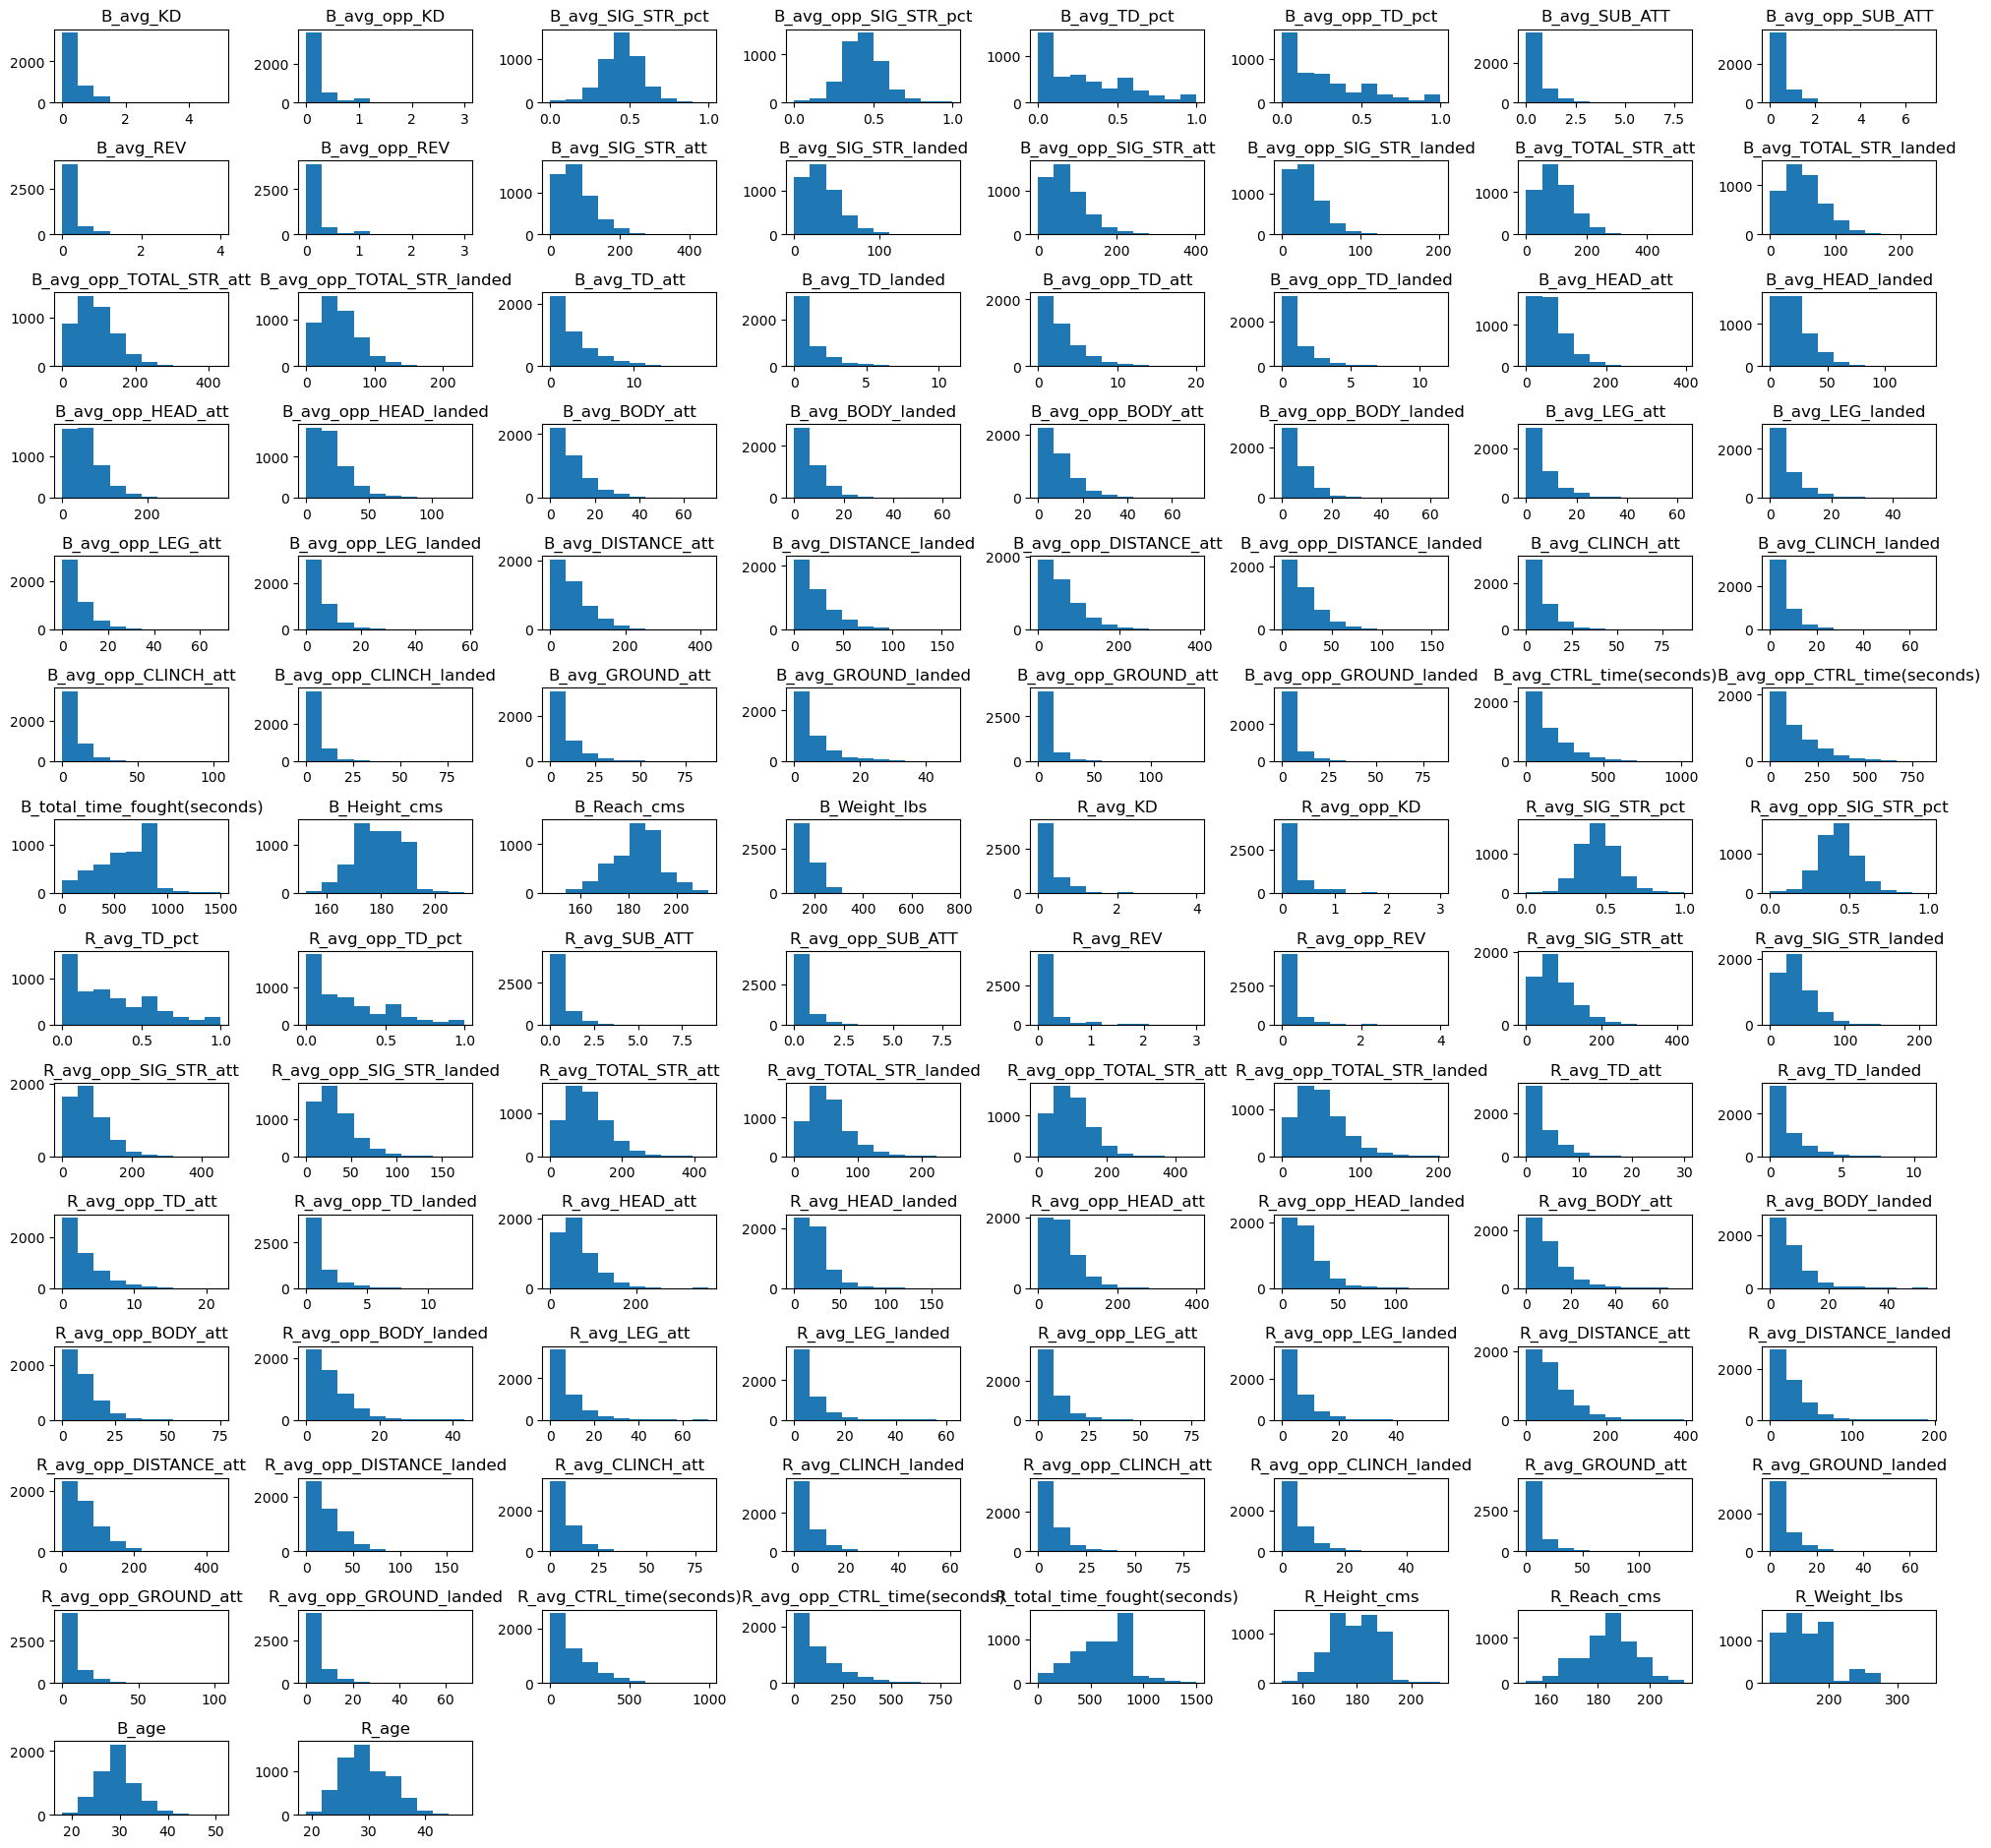

In [10]:
# Columns Distribution
float_columns=data.select_dtypes(float).columns

plt.figure(figsize=(20,20))
for count,col in enumerate(float_columns):
    plt.subplot(15,8,count+1)
    plt.hist(data[col])
    plt.title(col)
    
plt.tight_layout()

<AxesSubplot:>

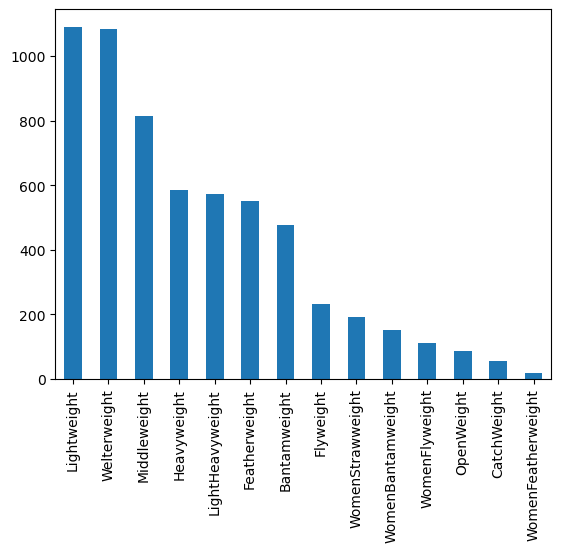

In [11]:
# pd.DataFrame(data.weight_class.value_counts(),columns=['weight_class','count'])
data.weight_class.value_counts().plot(kind='bar')

In [ ]:
# Total Fighters in dataset
r_fighters=list(data.R_fighter.value_counts().keys())
b_fighters=list(data.B_fighter.value_counts().keys())
unique_fighters=set(r_fighters+b_fighters)
combined = pd.concat([data['R_fighter'], data['B_fighter']])

print(f'Total Fighters in dataset: {len(combined)}')
print(f'Total Unique fighters in the dataset {len(unique_fighters)}')

# for i in range()
# plt.figure(figsize=(10,25))
combined.value_counts()[:20].plot(kind='bar',color='green',figsize=(10,5))

plt.title('Bar Chart of Top 20 Most Common Fighter Names in the Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# get the value counts for the Winner column
winner_counts = data.Winner.value_counts()

# create a dictionary to map winner names to colors
color_map = {'Red': 'red', 'Blue': 'blue', 'Draw': 'yellow'}

plt.figure(figsize=(7,4))
# create a bar plot with custom colors
ax = winner_counts.plot(kind='bar', color=[color_map[winner] for winner in winner_counts.index])

# add values on top of the bars
for i, v in winner_counts.reset_index().iterrows():
    ax.text(i, v.Winner + 0.9, str(v.Winner), color='purple', ha='center')

# add a legend for each color
legend_handles = []
for winner, color in color_map.items():
    legend_handles.append(plt.Rectangle((0,0),1,1,fc=color, edgecolor = 'green'))
ax.legend(legend_handles, color_map.keys())

# show the plot
plt.show()

# Analysing Missing Data

In [ ]:
columns_with_missing_data = (data.isnull().sum() > 0).sum()
total_missing_data = data.isnull().sum().sum()

print(f"Number of columns with missing data: {columns_with_missing_data}")
print(f"Total number of missing data items: {total_missing_data}")

In [ ]:
# Missing Data visualised 

print('The blue area highlights the missing data and the green area is the present data.')
cols = data.columns
colours = sns.color_palette("YlGnBu", n_colors=2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
# Further visualisation
print('We can see that the missingo martrix is not useful in this case as there are too many feature')
msno.matrix(data)

In [ ]:
def missing(frame):
    
    missing = frame.isnull().sum()
    
    missing.plot(kind='bar', figsize=(40, 12))
    plt.xlabel('Columns')
    plt.ylabel('Number of missing values')
    plt.title('Missing data')
    plt.show()
    
print('Missing data visualised in a barchart')
missing(data)

# Analysing Noise in the Dataset

The purpose of this section is to identify and use median values replace to remove outliers in the discrete variables, in doing this the hope is to reduce model over/underfitting when training the models.

In [ ]:
int_columns=data.select_dtypes(int).columns

print('Integer Columns: ')
print(int_columns)
print(f'Count of Integer columns: {len(int_columns)}')

In [ ]:
out={}
plt.figure(figsize=(15,15))
for  index,val in enumerate(data[int_columns]):
    plt.subplot(7,4,index+1)
    box=plt.boxplot(data[val])
    plt.title(val)
    out[val]=box['fliers'][0].get_ydata()
    
print('This box lot shows us the outliers as per the integer columns, we can see that much of the data is positively skewed.')
plt.tight_layout()
plt.show()

## Visualisation the noise in the dataset

In [ ]:
outliers_int=pd.DataFrame(columns=['Column_Name','Noise %'])

c=0

for i,j in out.items():
#     print(i,len(j)/len(data[i])*100)
    outliers_int.loc[c]=(i,len(j)/len(data[i])*100)
    c+=1

outliers_int.sort_values(by='Noise %',inplace=True,ascending=False)

top_10=outliers_int.head(10)
pd.set_option('display.max_colwidth', 25)
outliers_int.sort_values(by='Noise %',ascending=False,inplace=True)

colors = ['dodgerblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

fig, ax = plt.subplots(figsize=(10, 6))  

bars = ax.bar(range(len(top_10)), top_10['Noise %'], color=colors) 
plt.xticks(range(len(top_10)), top_10['Column_Name'], rotation=45, ha='right')
plt.xlabel('Int Column') 
plt.ylabel('Noise %') 
plt.title('Top 10 Columns with Highest Noise %') 

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(top_10['Noise %'][outliers_int.index[i]],2)) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [3]:
fig = plt.figure(figsize=(40, 40), dpi=512)
ax = fig.add_subplot(111)
data.skew().plot(kind='bar', ax=ax)
plt.show()

NameError: name 'data' is not defined

In [ ]:
# Replace outliers with median values

index_positions = []
for i in out.keys():
    index_positions.extend(list(np.where(np.isin(data[i], out[i]))[0]))

In [20]:
outlier_df = data.loc[index_positions]
# print('Outlier DataFrame:')

In [21]:
# Change the outlier values with median
for i in out.keys():
    index_positions = list(np.where(np.isin(data[i], out[i]))[0])
    data[i][index_positions] = data[i].median()
    
print('Count of null values in each column:')
print(data.isnull().sum())

Count of null values in each column:
R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [22]:
median = data['B_avg_KD'].median()
index_positions = np.where(np.isin(data['B_total_rounds_fought'], out['B_total_rounds_fought']))[0]
data['B_total_rounds_fought'][index_positions] = median

We can see that we have greatly reduce the outliers from the dataset.


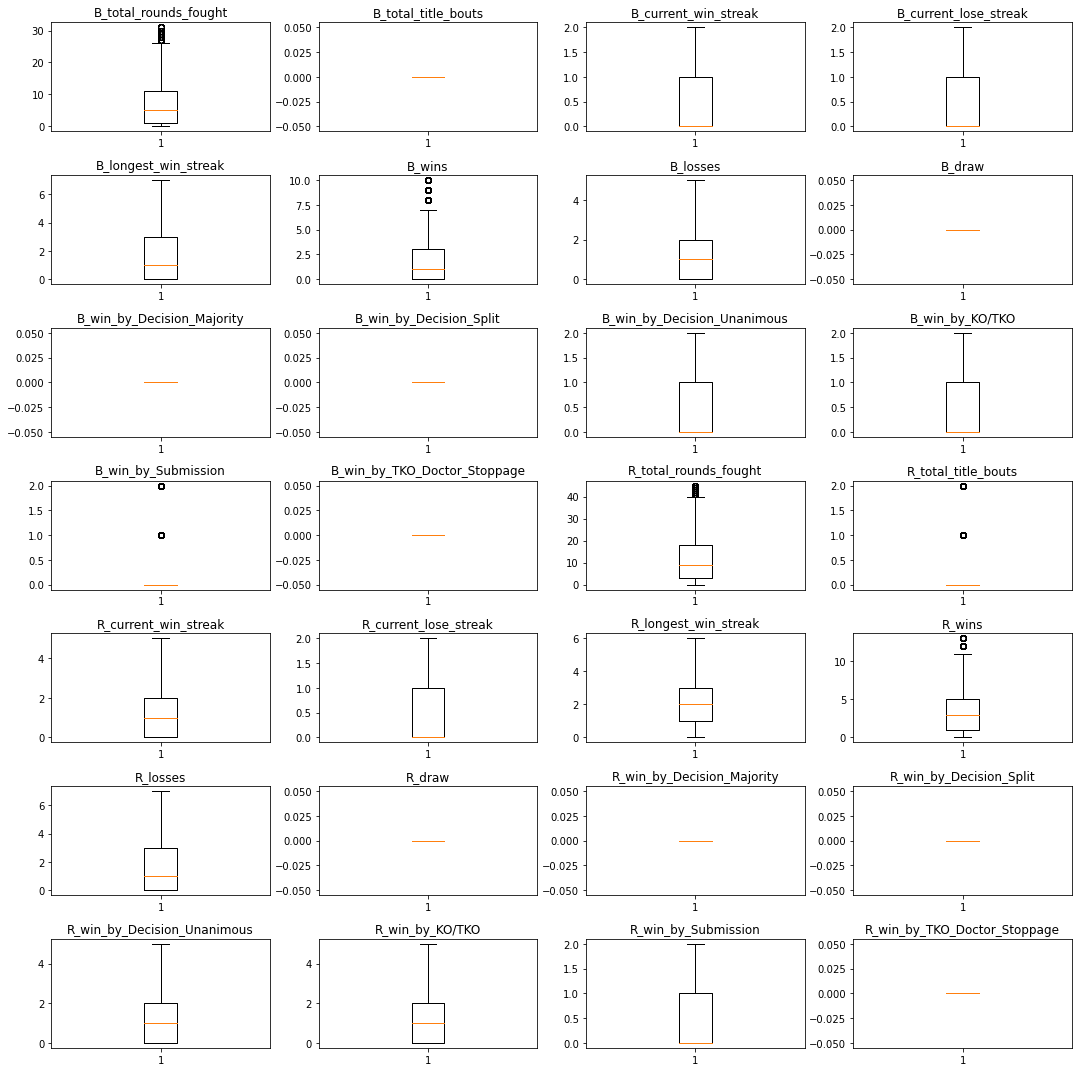

In [23]:
out={}
plt.figure(figsize=(15,15))
for  index,val in enumerate(data[int_columns]):
    plt.subplot(7,4,index+1)
    box=plt.boxplot(data[val])
    plt.title(val)
    out[val]=box['fliers'][0].get_ydata()
    
print('We can see that we have greatly reduce the outliers from the dataset.')
plt.tight_layout()
plt.show()

# Cleaning the Missing Data

In [24]:
# data.head()

In [25]:
# Using KNN and Standard Scaler

In [12]:
objs = data.select_dtypes(include='object').columns.tolist()
print(objs)

['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'weight_class', 'B_Stance', 'R_Stance']


In [13]:
data_cleaned1=data.copy()

In [14]:
encoders = {}
for i in objs:
    encoders[i] = LabelEncoder()
    
for i, e in encoders.items():
    data_cleaned1[i] = e.fit_transform(data[i])

In [15]:
data_cleaned1.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,11,691,29,549,78,2,False,0,0.00,0.00,0.42,0.49,0.33,0.36,0.50,1.00,0.00,0.00,50.00,20.00,84.00,45.00,76.50,41.00,114.00,64.00,1.50,1.00,9.00,6.50,39.50,11.00,63.00,27.50,7.50,7.00,12.00,9.00,3.00,2.00,9.00,8.50,35.00,12.50,43.50,17.50,10.50,4.50,4.00,3.00,4.50,3.00,36.50,24.50,34.00,277.50,531.50,4,0,0,1,1,1,1,0,0,0,0,0,1,0,1,165.10,170.18,135.00,1.00,0.00,0.50,0.46,0.00,0.00,0.00,0.00,0.00,0.00,34.00,17.00,13.00,6.00,35.00,18.00,16.00,9.00,0.00,0.00,3.00,0.00,32.00,15.00,11.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,33.00,16.00,12.00,6.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,54.00,166.00,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,170.18,177.80,135.00,31.00,27.00
1,1422,1616,65,549,78,2,False,7,0.50,0.00,0.66,0.30,0.30,0.50,1.50,0.00,0.00,0.00,65.50,35.00,50.00,16.50,113.50,68.50,68.50,29.00,2.50,1.50,0.50,0.50,46.00,20.00,36.00,7.50,12.00,8.00,8.00,3.00,7.50,7.00,6.00,6.00,58.00,30.00,48.00,15.50,0.50,0.50,0.50,0.50,7.00,4.50,1.50,0.50,219.50,24.50,577.50,4,0,2,0,2,2,0,0,0,1,0,1,0,0,1,187.96,193.04,205.00,1.03,0.06,0.58,0.38,0.41,0.12,0.25,1.19,0.38,0.25,77.56,43.16,69.16,27.59,93.12,57.22,98.34,52.47,1.28,0.78,4.69,0.44,71.09,38.06,50.41,13.34,4.69,3.31,9.09,6.16,1.78,1.78,9.66,8.09,58.31,30.44,63.31,23.12,6.97,3.66,5.00,4.12,12.28,9.06,0.84,0.34,176.16,154.69,747.34,17,0,2,0,2,4,2,0,0,1,0,3,0,0,1,182.88,187.96,185.00,32.00,28.00
2,1360,700,65,549,78

In [17]:
# Identify the features with missing values
missing_cols = [col for col in data.columns if data_cleaned1[col].isna().any()]

# Create a KNN imputer instance
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation on the missing values
data_cleaned1[missing_cols] = imputer.fit_transform(data[missing_cols])

data_cleaned1.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,11,691,29,549,78,2,False,0,0.00,0.00,0.42,0.49,0.33,0.36,0.50,1.00,0.00,0.00,50.00,20.00,84.00,45.00,76.50,41.00,114.00,64.00,1.50,1.00,9.00,6.50,39.50,11.00,63.00,27.50,7.50,7.00,12.00,9.00,3.00,2.00,9.00,8.50,35.00,12.50,43.50,17.50,10.50,4.50,4.00,3.00,4.50,3.00,36.50,24.50,34.00,277.50,531.50,4,0,0,1,1,1,1,0,0,0,0,0,1,0,1,165.10,170.18,135.00,1.00,0.00,0.50,0.46,0.00,0.00,0.00,0.00,0.00,0.00,34.00,17.00,13.00,6.00,35.00,18.00,16.00,9.00,0.00,0.00,3.00,0.00,32.00,15.00,11.00,5.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,33.00,16.00,12.00,6.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,54.00,166.00,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,170.18,177.80,135.00,31.00,27.00
1,1422,1616,65,549,78,2,False,7,0.50,0.00,0.66,0.30,0.30,0.50,1.50,0.00,0.00,0.00,65.50,35.00,50.00,16.50,113.50,68.50,68.50,29.00,2.50,1.50,0.50,0.50,46.00,20.00,36.00,7.50,12.00,8.00,8.00,3.00,7.50,7.00,6.00,6.00,58.00,30.00,48.00,15.50,0.50,0.50,0.50,0.50,7.00,4.50,1.50,0.50,219.50,24.50,577.50,4,0,2,0,2,2,0,0,0,1,0,1,0,0,1,187.96,193.04,205.00,1.03,0.06,0.58,0.38,0.41,0.12,0.25,1.19,0.38,0.25,77.56,43.16,69.16,27.59,93.12,57.22,98.34,52.47,1.28,0.78,4.69,0.44,71.09,38.06,50.41,13.34,4.69,3.31,9.09,6.16,1.78,1.78,9.66,8.09,58.31,30.44,63.31,23.12,6.97,3.66,5.00,4.12,12.28,9.06,0.84,0.34,176.16,154.69,747.34,17,0,2,0,2,4,2,0,0,1,0,3,0,0,1,182.88,187.96,185.00,32.00,28.00
2,1360,700,65,549,78

In [ ]:
from pandas_profiling import ProfileReport

profile=ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
print('Summary Statistics:')
summary=columns_summary(data_cleaned1)

summary_df=pd.DataFrame(summary).fillna('🥊')
summary_df

In [ ]:
from sklearn.preprocessing import StandardScaler
X=data_cleaned1.drop('Winner',axis=1)
scaler=StandardScaler()
x_scl=pd.DataFrame(scaler.fit_transform(X),columns=data_cleaned1.columns)
x_scl.head(5)

# Transformation

In [32]:
X = x_scl
Y = data_cleaned1['Winner']

In [33]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import RFECV

# model = DecisionTreeClassifier()

# rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')

# # Fit RFECV to the data
# rfecv.fit(X, Y)

# # Print the optimal number of features
# print("Optimal number of features: %d" % rfecv.n_features_)

# # Print the feature ranking
# feature_ranking = rfecv.ranking_
# print("Feature ranking: %s" % feature_ranking)

# # Count the number of occurrences of each feature ranking
# count = pd.Series(feature_ranking).value_counts()

# # Print the count of the most important feature
# most_important_count = count.min()
# print("Count of the most important feature: %d" % most_important_count)

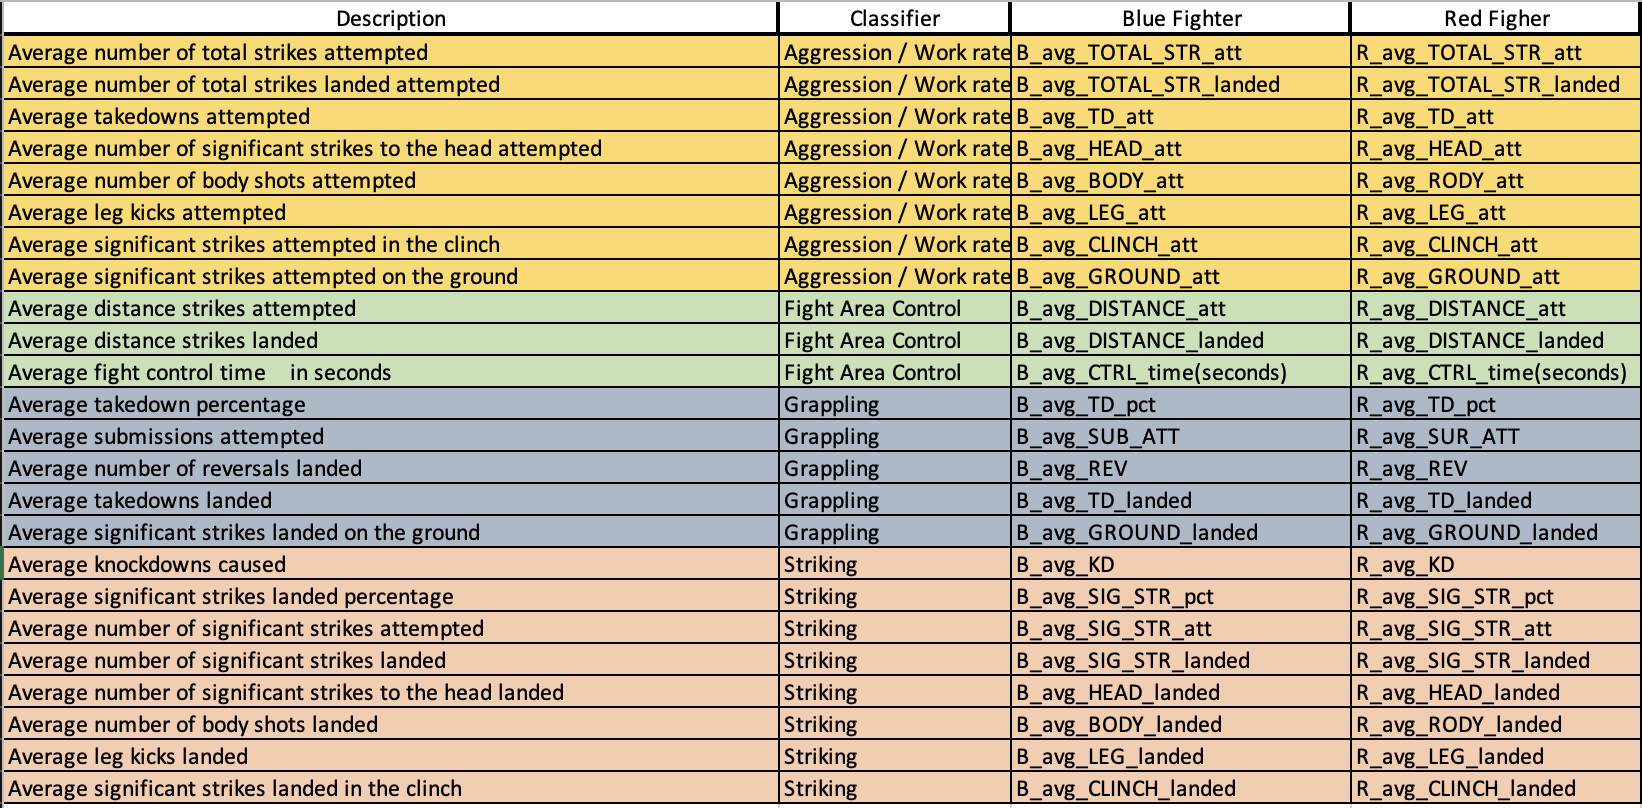

In [34]:
# googledrive shareable link

from IPython import display
display.Image("/Users/vishangunatilleka/Queen_Mary/Term2/ECS784U_Data_Analytics/project2/ufc_data_kaggle_v2_08.03/feature_table.png")

In [35]:
X.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

In [38]:
# Select the columns to combine and calculate the mean
work_rate_B_fighter = ['B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_HEAD_att', 'B_avg_BODY_att', 'B_avg_LEG_att', 'B_avg_CLINCH_att', 'B_avg_GROUND_att']
work_rate_B_fighter = X[[work_rate_B_fighter]].mean(axis=1)

# fight_area_B_fighter = [['B_avg_DISTANCE_att','B_avg_DISTANCE_landed','B_avg_CTRL_time(seconds)']]
# fight_area_B_fighter = X[fight_area_B_fighter].mean(axis=1)

# grappling_B_fighter = [['B_avg_TD_pct','B_avg_SUB_ATT','B_avg_REV','B_avg_TD_landed','B_avg_GROUND_landed']]
# grappling_B_fighter = X[grappling_B_fighter].mean(axis=1)

# striking_B_fighter = [['B_avg_KD','B_avg_SIG_STR_pct','B_avg_SIG_STR_att','B_avg_SIG_STR_landed','B_avg_HEAD_landed','B_avg_BODY_landed','B_avg_LEG_landed','B_avg_CLINCH_landed']]
# striking_B_fighter = X[striking_B_fighter].mean(axis=1)

# work_rate_R_fighter = [['R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_avg_TD_att', 'R_avg_HEAD_att', 'R_avg_BODY_att', 'R_avg_LEG_att', 'R_avg_CLINCH_att', 'R_avg_GROUND_att']]
# work_rate_R_fighter = X[work_rate_R_fighter].mean(axis=1)

# fight_area_R_fighter = [['R_avg_DISTANCE_att','R_avg_DISTANCE_landed','R_avg_CTRL_time(seconds)']]
# fight_area_R_fighter = X[fight_area_R_fighter].mean(axis=1)

# grappling_R_fighter = [['R_avg_TD_pct','R_avg_SUB_ATT','R_avg_REV','R_avg_TD_landed','R_avg_GROUND_landed']]
# grappling_R_fighter = X[grappling_R_fighter].mean(axis=1)

# striking_R_fighter = [['R_avg_KD','R_avg_SIG_STR_pct','R_avg_SIG_STR_att','R_avg_SIG_STR_landed','R_avg_HEAD_landed','R_avg_BODY_landed','R_avg_LEG_landed','R_avg_CLINCH_landed']]
# striking_R_fighter = X[striking_R_fighter].mean(axis=1)

# # Create a new dataframe with the combined column and additional columns
# new_data = pd.DataFrame({
#     'R_fighter': X['R_fighter'],
#     'B_fighter': X['B_fighter'],
#     'B_current_win_streak':X['B_current_win_streak'],
#     'B_current_lose_streak':X['B_current_lose_streak'],
#     'B_wins':X['B_wins'],
#     'B_losses':X['B_losses'],
#     'B_draw':X['B_draw'],
#     'B_win_by_Decision_Majority':X['B_win_by_Decision_Majority'],
#     'B_win_by_Decision_Split':X['B_win_by_Decision_Split'],
#     'B_win_by_Decision_Unanimous':X['B_win_by_Decision_Unanimous'],
#     'B_win_by_KO/TKO':X['B_win_by_KO/TKO'],
#     'B_win_by_Submission':X['B_win_by_Submission'],
#     'B_win_by_TKO_Doctor_Stoppage':X['B_win_by_TKO_Doctor_Stoppage'],
#     'B_Stance':X['B_Stance'],
#     'B_Height_cms':X['B_Height_cms'],
#     'B_Reach_cms':X['B_Reach_cms'],
#     'B_Weight_lbs':X['B_Weight_lbs'],
#     'B_age':X['B_age'],
#     'work_rate_B_fighter': work_rate_B_fighter,
#     'fight_area_B_fighter':fight_area_B_fighter,
#     'grappling_B_fighter': grappling_B_fighter,
#     'striking_B_fighter': striking_B_fighter,
#     'R_current_win_streak':X['R_current_win_streak'],
#     'R_current_lose_streak':X['R_current_lose_streak'],
#     'R_wins':X['R_wins'],
#     'R_losses':X['R_losses'],
#     'R_draw':X['R_draw'],
#     'R_win_by_Decision_Majority':X['R_win_by_Decision_Majority'],
#     'R_win_by_Decision_Split':X['R_win_by_Decision_Split'],
#     'R_win_by_Decision_Unanimous':X['R_win_by_Decision_Unanimous'],
#     'R_win_by_KO/TKO':X['R_win_by_KO/TKO'],
#     'R_win_by_Submission':X['R_win_by_Submission'],
#     'R_win_by_TKO_Doctor_Stoppage':X['R_win_by_TKO_Doctor_Stoppage'],
#     'R_Stance':X['R_Stance'],
#     'R_Height_cms':X['R_Height_cms'],
#     'R_Reach_cms':X['R_Reach_cms'],
#     'R_Weight_lbs':X['R_Weight_lbs'],
#     'R_age':X['R_age'],
#     'work_rate_R_fighter': work_rate_R_fighter,
#     'fight_area_R_fighter':fight_area_R_fighter,
#     'grappling_R_fighter': grappling_R_fighter,
#     'striking_B_fighter': striking_B_fighter,
# })

# # Print the new dataframe
# new_data.head()

# work_rate_B_fighter

KeyError: "None of [Index([('B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_HEAD_att', 'B_avg_BODY_att', 'B_avg_LEG_att', 'B_avg_CLINCH_att', 'B_avg_GROUND_att')], dtype='object')] are in the [columns]"

In [ ]:
X = new_data.copy()
# X.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, Y_train)
predict = log.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predict))

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
predict_tree = dtree.predict(X_test)
print(classification_report(Y_test, predict_tree))

In [ ]:
plot_tree(dtree, feature_names=X.columns, class_names=["Blue","Draw","Red"], filled=True)
plt.show()

In [ ]:
help (plot_tree)

In [ ]:
data2=pd.read_csv('data.csv').dropna()

x,y = data2.drop('Winner', axis=1), LabelEncoder().fit_transform(data2[['Winner']])

# first location label encoding, title bout label encode, date drop, name of fighter, label encode

x[['R_fighter','B_fighter','Referee','location','title_bout', 'weight_class', 'R_Stance', 'B_Stance']]

# column = list(data.select_dtypes('object').columns).remove('date')

col=list(x.select_dtypes('object').columns)
col.remove('date')
col.append('title_bout')
x.drop('date', axis=1, inplace=True)

for i in col:
    x[i]=LabelEncoder().fit_transform(x[[i]])

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
com = pd.DataFrame(tsne.fit_transform(x), columns=['a','b'])

fig, ax = plt.subplots(figsize=(20,20))
# plt.figure(figsize=(80,80))

scatter = ax.scatter(com.a, com.b, c=y,alpha=.5,cmap='PiYG')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right";